# Inferential Statistics
Dataset: "Titanic - Machine Learning from Disaster"

In [121]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [122]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [123]:
#Number of rows and columns in the dataset
num_rows, num_columns = df.shape
print("Number of rows:",num_rows)
print("Number of columns:",num_columns)

Number of rows: 891
Number of columns: 12


In [124]:
null_val = df.isnull().sum()
print("Null values in each column")
print(null_val)

Null values in each column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [125]:
# fill the null values
from sklearn.impute import SimpleImputer

# As age is a continuous variable, we will use average imputation
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# As Embarked is a categorical variables, we will use mode imputation instead of mean imputation
embark_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embark_imputer.fit_transform(df[['Embarked']])

#Cabin has a lot of null values, so I'll just drop it
df.drop('Cabin', axis=1, inplace=True)

null_val = df.isnull().sum()
print("Null values in each column")
print(null_val)

Null values in each column
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [126]:
# drop unnecessary columns name and ticket
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [127]:
# group the age column
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)

In [128]:
df.drop('Age',axis=1,inplace=True)

## Hypothesis Testing
**Question 1: Does Age has a significant impact on the survival of the Passengers?**

Ho = Age does not have a significant impact on the survival

HA = Age has a significant impact on the survival

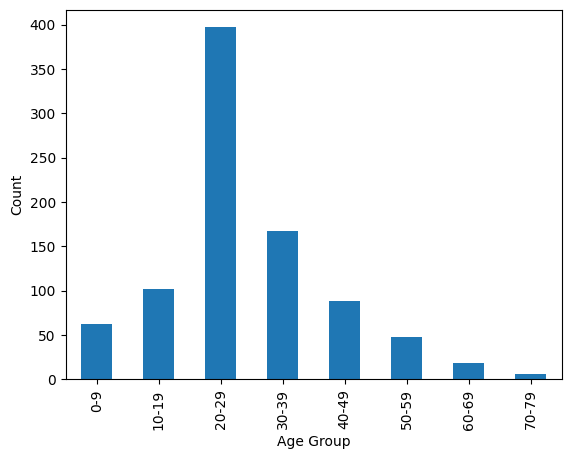

In [129]:
# plotting the graph
Age_data = df.groupby(['age_group']).size()
Age_data.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel('Count')
plt.show()

From the above graph we can conclude that majority of passengers were aged between 20-29

In [130]:
print(df.groupby(['age_group']).Survived.mean())

age_group
0-9      0.612903
10-19    0.401961
20-29    0.324937
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


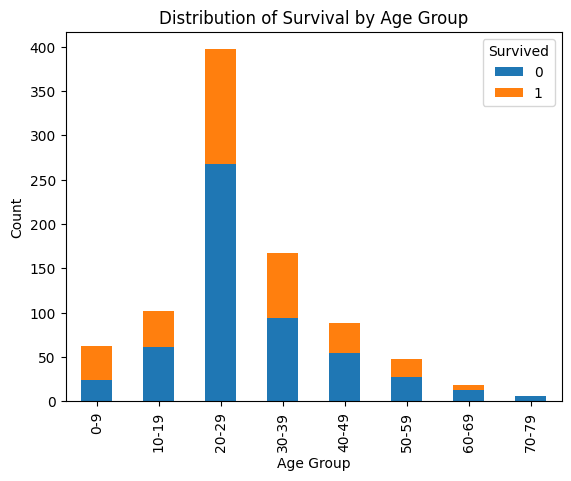

In [131]:
contingency_table = pd.crosstab(df['age_group'],df['Survived'])

# Step 4: Visualize the data
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Survival by Age Group')
plt.show()

Terminologies

Expected Frequency:  These values serve as a reference to compare with the observed frequencies in the contingency table, helping to assess the degree of association between the variables.

chi2_statistics: This variable represents the computed chi-square test statistic. The chi-square test statistic measures the deviation between the observed frequencies and the expected frequencies in each cell of the contingency table. It provides an indication of the overall association or dependence between the variables.

p_value: This variable represents the p-value associated with the chi-square test statistic. The p-value is the probability of obtaining results as extreme as the observed results, assuming that the null hypothesis (independence) is true. It indicates the strength of evidence against the null hypothesis and helps determine the statistical significance of the association.

_: In the code snippet, two _ variables are used to discard the other returned values from the chi2_contingency() function that are not needed for further analysis.

A larger chi-square value and a smaller p-value indicate a stronger association, suggesting that the variables are not independent.

In [132]:
from scipy.stats import chi2_contingency

# Step 5: Calculate the expected frequencies
expected_freq = chi2_contingency(contingency_table)[3]

# Step 6: Compute the chi-square test statistic
chi2_statistics, p_value, _, _ = chi2_contingency(contingency_table)

# Step 7: Determine the p-value
significance_level = 0.05

# Step 8: Interpret the results
print("Chi statistics:",chi2_statistics)
print("p_value =",p_value)
if p_value < significance_level:
    print("There is evidence of an association between age and survival.")
else:
    print("There is no significant evidence of an association between age and survival.")

Chi statistics: 26.071175838057542
p_value = 0.0004891297857944056
There is evidence of an association between age and survival.


In [133]:
# Step 9: Create and analyze the contingency table
expected_freq_reshaped = expected_freq.reshape(contingency_table.shape)
contingency_table_with_stats = pd.DataFrame({
    'Survived: 0': contingency_table[0],
    'Survived: 1': contingency_table[1],
    'Expected: 0': expected_freq_reshaped[:, 0],
    'Expected: 1': expected_freq_reshaped[:, 1]
})

print(contingency_table_with_stats)

           Survived: 0  Survived: 1  Expected: 0  Expected: 1
age_group                                                    
0-9                 24           38    38.244944    23.755056
10-19               61           41    62.919101    39.080899
20-29              268          129   244.891011   152.108989
30-39               94           73   103.014607    63.985393
40-49               55           34    54.900000    34.100000
50-59               28           20    29.608989    18.391011
60-69               13            6    11.720225     7.279775
70-79                6            0     3.701124     2.298876


###Conclusion
The p-value and the contingency table analysis provide a strong evidence to suggest the association between age and Survival

**Question 2: Does Passenger Class has an impact on the survival of the Passengers?**

Ho = Passenger Class does not have an impact on the survival

HA = Passenger Class has a impact on the survival

In [134]:
class_count = df['Pclass'].value_counts()
print("The count pf Passenger in each class")
print(class_count)

The count pf Passenger in each class
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [135]:
class_survivors = df[df['Survived']==1].groupby('Pclass')['Survived'].value_counts()
print("Count of Survivors from each class")
print(class_survivors)

Count of Survivors from each class
Pclass  Survived
1       1           136
2       1            87
3       1           119
Name: Survived, dtype: int64


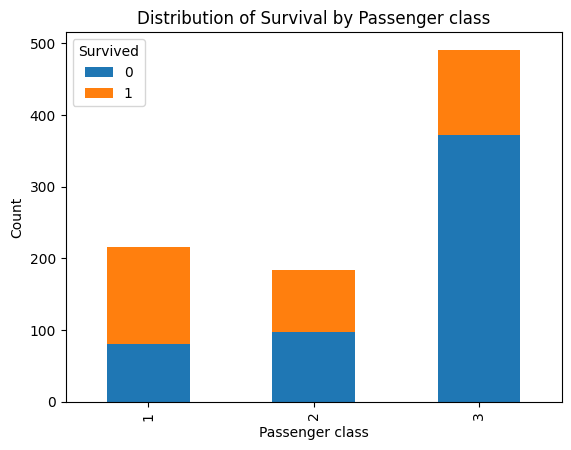

In [136]:
#create the contingency_table
contingency_table = pd.crosstab(df['Pclass'],df['Survived'])

#Data Visualization
contingency_table.plot(kind="bar",stacked=True)
plt.xlabel("Passenger class")
plt.ylabel("Count")
plt.title("Distribution of Survival by Passenger class")
plt.show()

It is clear from the above analysis that although the number of passengers from the 1st class is higher, their survival rate is the lowest. Additionally, most of the passengers who survived were from the 1st class.

Time to test this theory using hypothesis testing

In [137]:
# Calculate survival rates by passenger class
survival_rates_class = df.groupby('Pclass')['Survived'].mean()

from scipy.stats import f_oneway

# Perform one-way ANOVA test
result_class = f_oneway(df[df['Pclass'] == 1]['Survived'],
                        df[df['Pclass'] == 2]['Survived'],
                        df[df['Pclass'] == 3]['Survived'])
p_value_class = result_class.pvalue
print(p_value_class)

2.1832474151179777e-24


In [138]:
if p_value_class < 0.05:
    print("There is a significant difference in survival rates among passenger classes.")
else:
    print("There is no significant difference in survival rates among passenger classes.")

There is a significant difference in survival rates among passenger classes.


## Confidence Interval
What is the estimated range of survival rates for different passenger classes with a certain level of confidence?

In [139]:
#Step 1: group the passenger class based on their survival status
class_group = df.groupby('Pclass')['Survived']

In [140]:
#Step 2: calculate mean and standard deviation
class_mean = class_group.mean()
class_std = class_group.std(ddof=1)
print("Class mean: ")
print(class_mean,"\n")
print("Class Standard Deviation: ")
print(class_std)

Class mean: 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Class Standard Deviation: 
Pclass
1    0.484026
2    0.500623
3    0.428949
Name: Survived, dtype: float64


In [141]:
#Step 3: Count the number of observations in each class
class_count = class_group.count()
print("Total number of Observations in each group:")
print(class_count)

Total number of Observations in each group:
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


In [142]:
#Step 4: Set the desired confidence level
confidence_level = 0.95

In [143]:
from scipy.stats import t

#Step 5: calculate critical value using degree of freedom and confidence level
degree_of_freedom = class_count-1
critical_value = t.ppf(confidence_level, degree_of_freedom)
print("Degree of Freedom:",degree_of_freedom,"\n")
print("Critical Value:",critical_value)


Degree of Freedom: Pclass
1    215
2    183
3    490
Name: Survived, dtype: int64 

Critical Value: [1.65197175 1.6532228  1.64796928]


While not subtracting 1 may not drastically alter the results, it is important to follow the standard conventions and best practices in statistical analysis. Subtracting 1 ensures consistency and aligns with the principles of hypothesis testing and confidence interval estimation.

In [144]:
#Step 6: calculate the margin of error
margin_of_error = critical_value * (class_std/(np.sqrt(class_count)))
print("Margin of error:")
print(margin_of_error)

Margin of error:
Pclass
1    0.054406
2    0.061015
3    0.031902
Name: Survived, dtype: float64


In [145]:
#Step 7: calculate the lower bound and the upper bound
lower_bound = class_mean - margin_of_error
upper_bound = class_mean + margin_of_error

In [146]:
#Create a dataframe to store the confidence interval
confidence_interval = pd.DataFrame({'Lowerbound': lower_bound,"Upperbound": upper_bound})

In [147]:
#Step 8: Display confidence interval
print(confidence_interval)

        Lowerbound  Upperbound
Pclass                        
1         0.575224    0.684035
2         0.411812    0.533841
3         0.210461    0.274264


### Conclusion
Above are the estimated range of survival rate for different passenger class with 95% of confidence level

##Regression Analysis

In [148]:
# I will create dummy variables to convert all the categorical variables into numerical format
Sex = pd.get_dummies(df['Sex'], drop_first=True)

In [149]:
Pclass = pd.get_dummies(df['Pclass'], drop_first=True)

In [150]:
Embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [151]:
age = pd.get_dummies(df['age_group'], drop_first=True)

In [152]:
df = pd.concat([df,Pclass,Embarked,age,Sex],axis=1)

In [118]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age_group,2,...,Q,S,10-19,20-29,30-39,40-49,50-59,60-69,70-79,male
0,1,0,3,male,1,0,7.2500,S,20-29,0,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,female,1,0,71.2833,C,30-39,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,female,0,0,7.9250,S,20-29,0,...,0,1,0,1,0,0,0,0,0,0
3,4,1,1,female,1,0,53.1000,S,30-39,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0,3,male,0,0,8.0500,S,30-39,0,...,0,1,0,0,1,0,0,0,0,1


In [153]:
#drop extra columns
df.drop(['Pclass','Sex','Embarked','age_group','PassengerId'],axis=1,inplace=True)

In [154]:
df.head()

,Survived,SibSp,Parch,Fare,2,3,Q,S,10-19,20-29,30-39,40-49,50-59,60-69,70-79,male
0,0,1,0,7.2500,0,1,0,1,0,1,0,0,0,0,0,1
1,1,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,7.9250,0,1,0,1,0,1,0,0,0,0,0,0
3,1,1,0,53.1000,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,8.0500,0,1,0,1,0,0,1,0,0,0,0,1


In [162]:
# Create X and y variables
X = df.drop('Survived',axis=1) #independent variables
y = df['Survived'] #dependent variable that we're trying to predict

In [159]:
#Split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [164]:
#training the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [167]:
#make predictions on the test dataset
predictions = logmodel.predict(X_test)

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.83      0.65      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[139  15]
 [ 40  74]]
